_Digital Marketing Campaign Conversion Prediction_
-

_Problem:_
-

_Digital marketing campaigns often struggle with inefficient resource allocation and suboptimal targeting, leading to low conversion rates and wasted advertising spend. Despite having access to diverse demographic and engagement data, identifying potential customers who are likely to convert remains a challenge. Without accurate predictive tools, companies face difficulties in improving campaign effectiveness and maximizing returns on advertising investments._

_Objectives:_
-
_The objective of this project is to develop a robust machine learning model that accurately predicts customer conversions in digital marketing campaigns. By leveraging demographic and engagement data, the model will help identify high-potential customers, enabling optimized campaign targeting. This will lead to improved conversion rates, cost-efficient resource allocation, and a higher return on advertising spend (ROAS)._


_Step 1 : Import Libraries_
-

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import tools for model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, f1_score, accuracy_score, average_precision_score
# Library for saving and loading models
import joblib
# Ignore warnings during execution
import warnings
warnings.filterwarnings("ignore")

_Step 2 : Read Dataset_
-

In [2]:
# load data
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

_Step 3 : Data Preprocessing_
-

In [3]:
# Check Data
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
# Check number of rows and columns
df.shape

(8000, 20)

In [5]:
# Check for Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [6]:
# check null value
df.isnull().sum()


CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [7]:
# Display statistical summary
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [8]:
# Count Categories
df['Gender'].value_counts()

Gender
Female    4839
Male      3161
Name: count, dtype: int64

In [9]:
# Count Categories
df['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

In [10]:
# Count Categories
df['CampaignChannel'].value_counts()

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

In [11]:
# Drop unnecessary Columns
df.drop(columns= ['AdvertisingPlatform', 'CustomerID', 'AdvertisingTool'], axis= 1, inplace= True)

In [12]:
# after Dropping columns check dataset
df.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


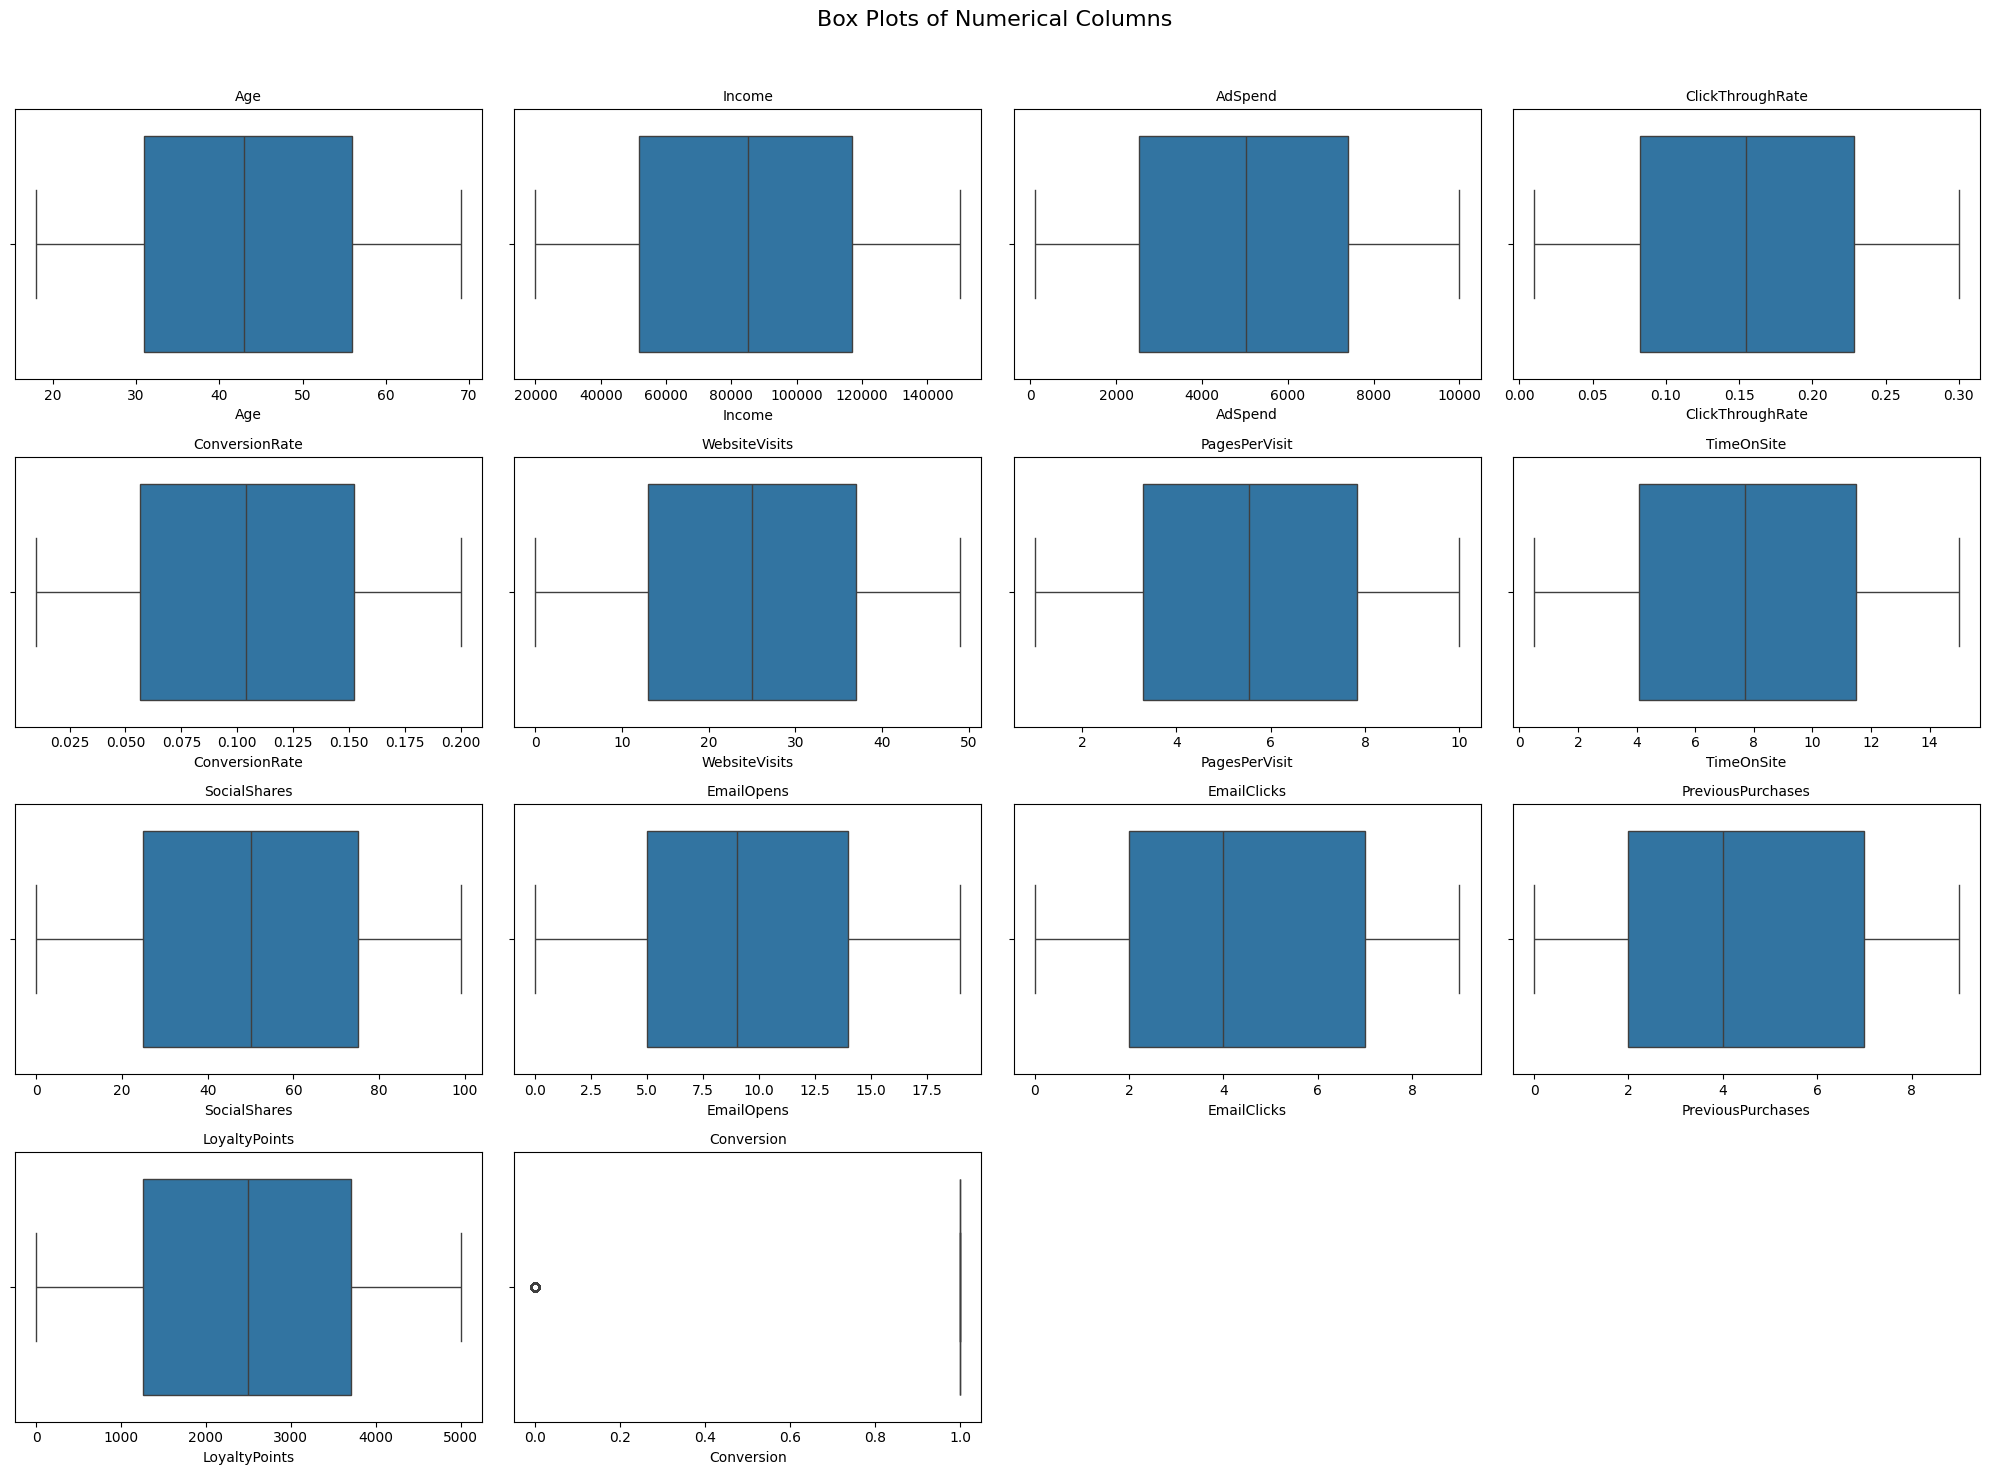

In [13]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Define the grid for subplots
n_cols = 4
n_rows = -(-len(numeric_columns) // n_cols)  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)

# Hide unused axes
for ax in axes[len(numeric_columns):]:
    ax.axis('off')

# Add a main title
fig.suptitle('Box Plots of Numerical Columns', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
plt.show()


_Step 4 : Exploratory Data Analysis (EDA)_
-

**_Distribution of Categorical Features_**

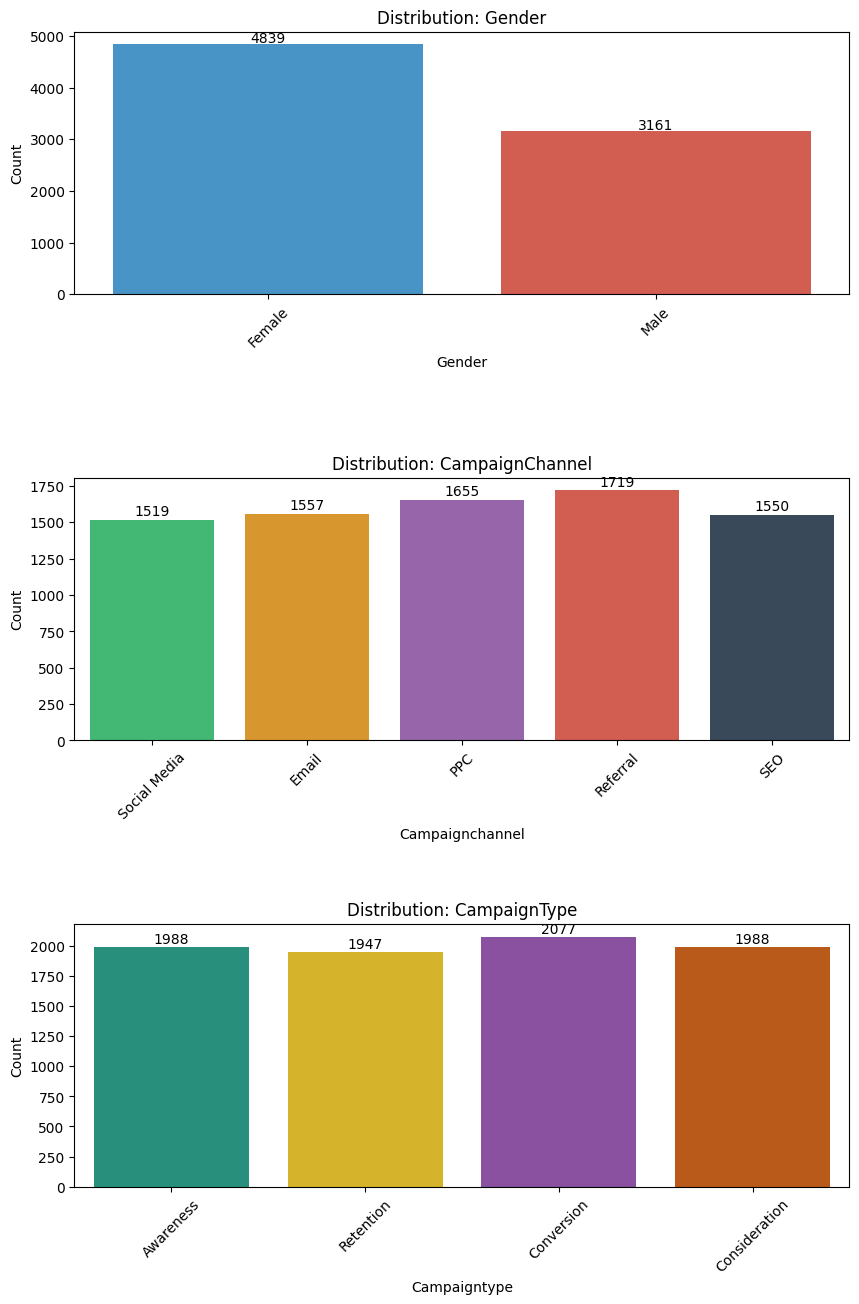

In [14]:
# Define the new palettes for each feature
palettes = {
    'Gender': ['#3498db', '#e74c3c'],  
    'CampaignChannel': ['#2ecc71', '#f39c12', '#9b59b6', '#e74c3c', '#34495e'],  
    'CampaignType': ['#16a085', '#f1c40f', '#8e44ad', '#d35400']  
}

# Create subplots
fig, axes = plt.subplots(len(palettes), 1, figsize=(10, 5 * len(palettes)))
plt.subplots_adjust(wspace=0.4, hspace=0.7)

# Iterate over the palettes and features, plotting each
for ax, (feature, palette) in zip(axes, palettes.items()):
    sns.countplot(x=feature, data=df, palette=palette, ax=ax)
    ax.set(ylabel="Count", title=f'Distribution: {feature}', xlabel=feature.capitalize())
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on top of bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 30,
                round(p.get_height()), ha="center")

plt.show()


**_Distribution of Numerical Features_**

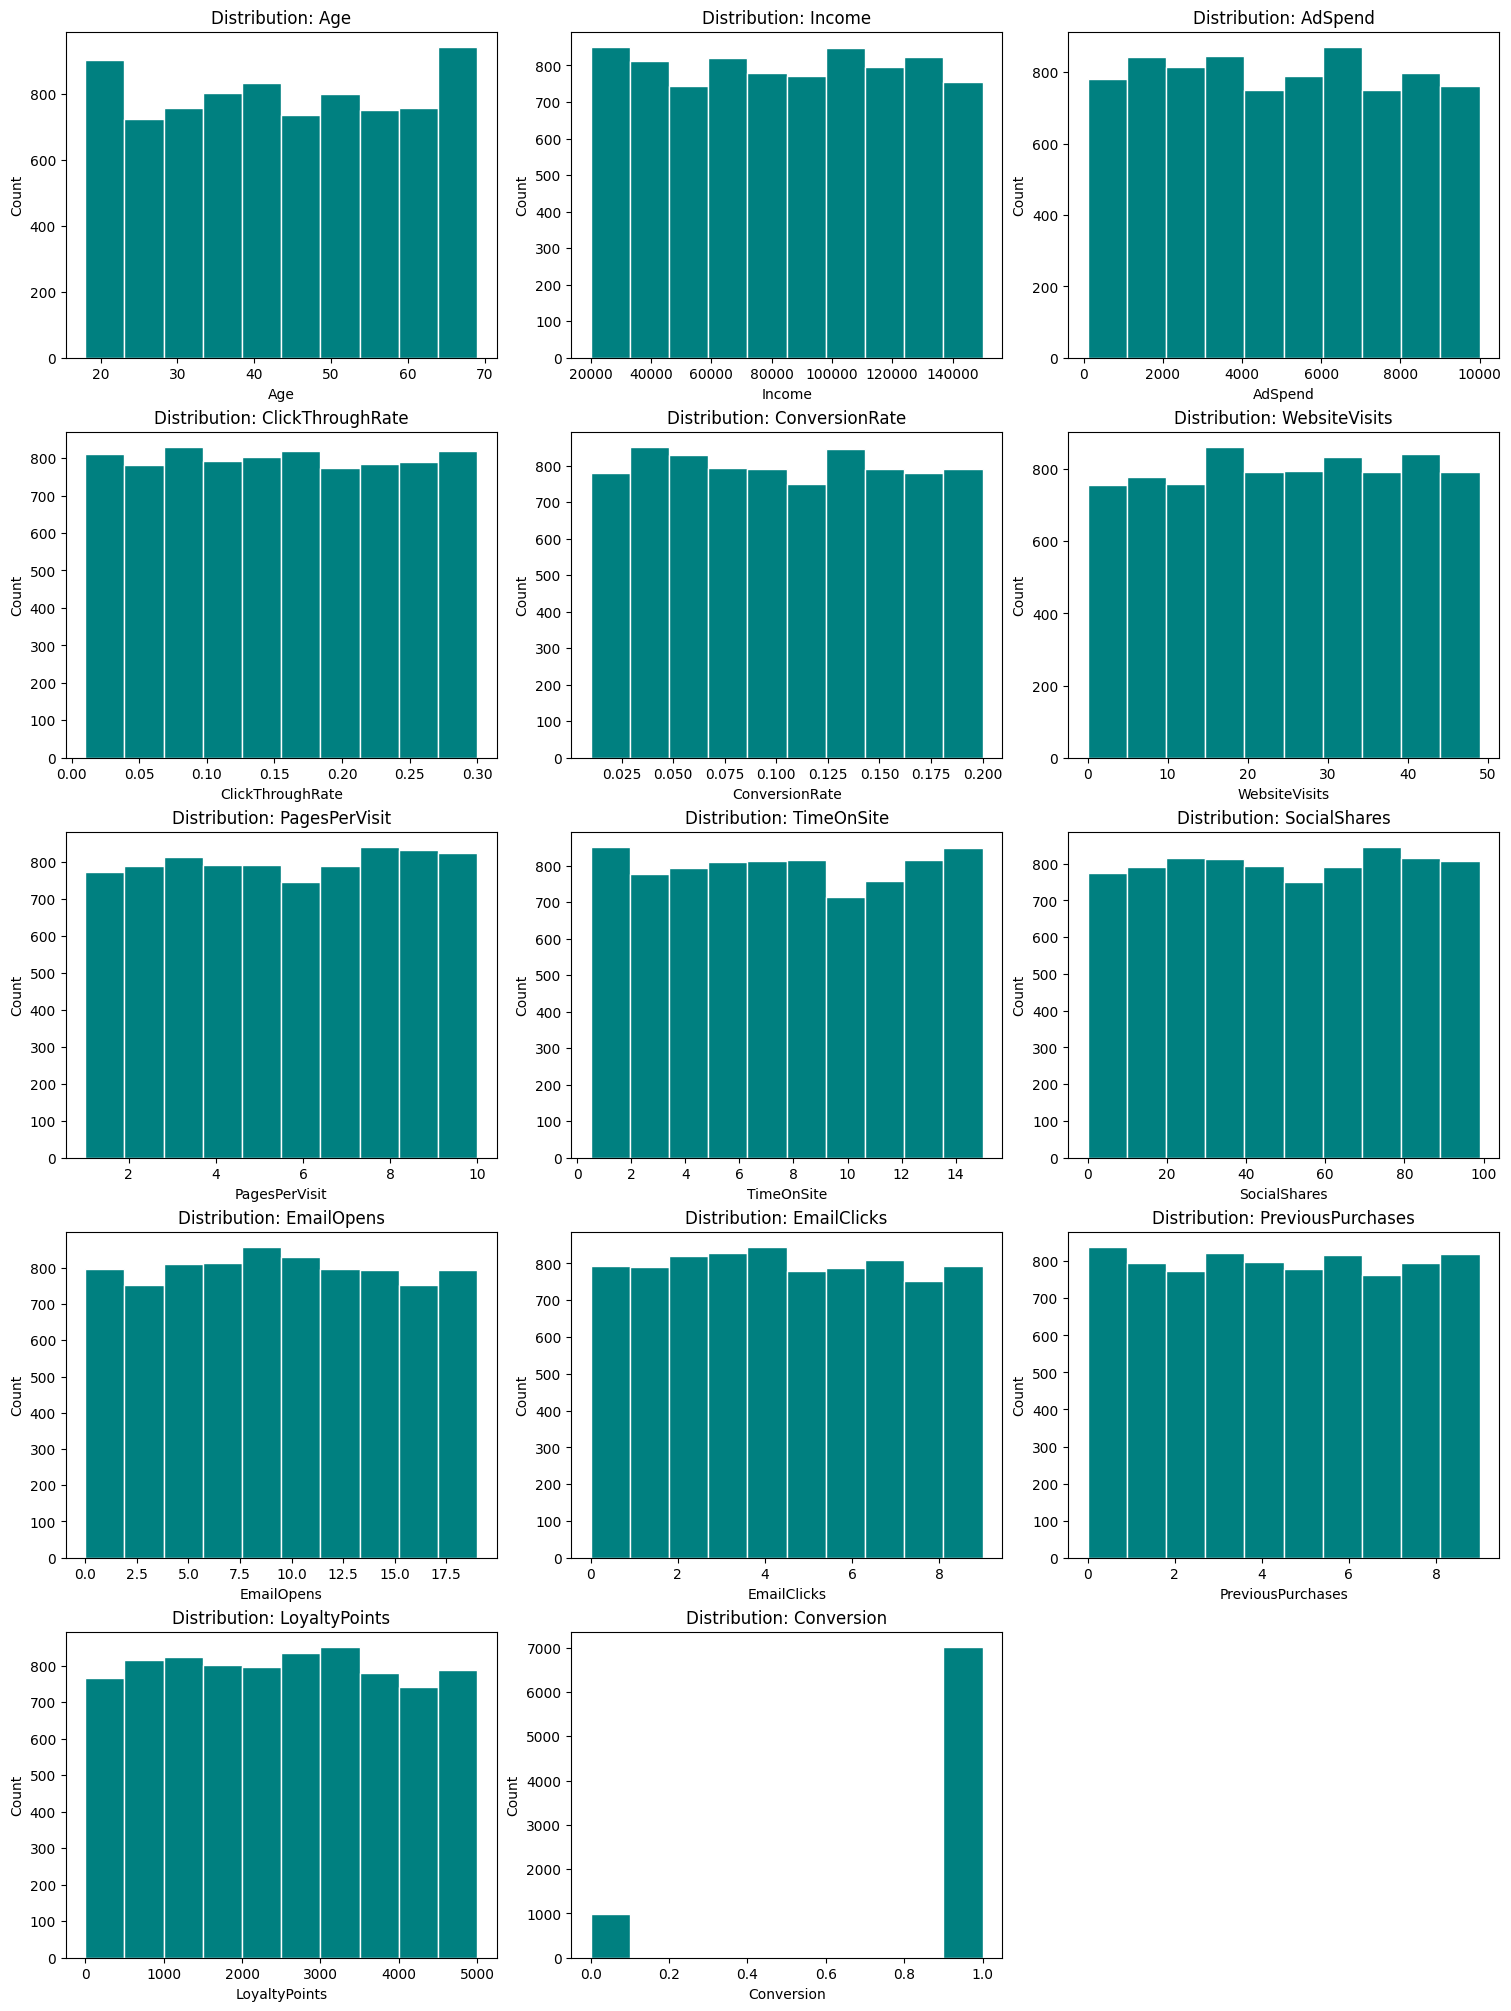

In [15]:
# Filter numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Define the number of subplots
nrows, ncols = 5, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 20), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numeric_columns):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        axes[i].hist(df[col], color='teal', edgecolor='white')
        axes[i].set_title(f'Distribution: {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Hide unused subplots
for ax in axes[len(numeric_columns):]:
    ax.axis('off')

plt.show()


**_Analyzing Adspend to conversion analysis_**

<Axes: xlabel='Count', ylabel='AdSpend'>

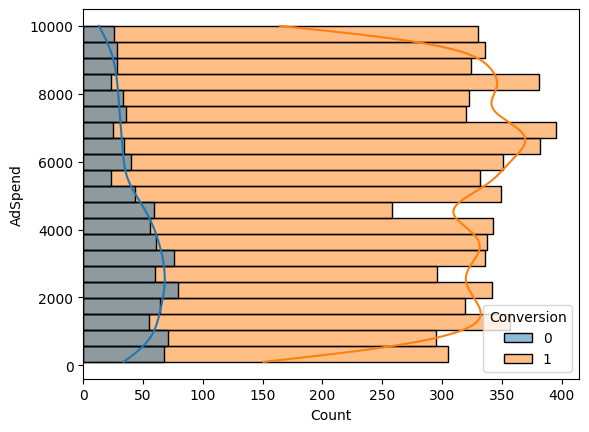

In [16]:
# Create a histogram plot
sns.histplot(data = df, y = 'AdSpend', hue = 'Conversion', kde = True)

**_Analyzing Campaign Type to Gender_**

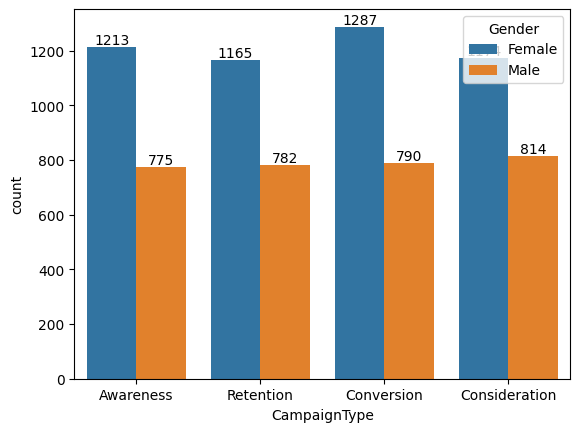

In [17]:
# Count plot with labels
ax = sns.countplot(data=df, x='CampaignType', hue='Gender')

# Add data labels
for bar in ax.containers:
    ax.bar_label(bar, fontsize=10)

plt.show()


**_Counting the values of Conversion_**

Conversion
1    7012
0     988
Name: count, dtype: int64


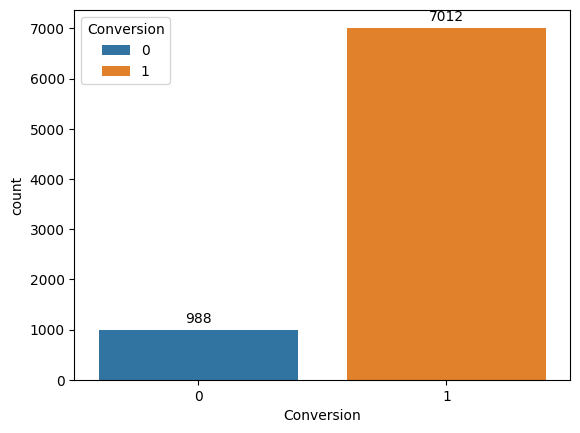

In [18]:
print(df['Conversion'].value_counts())
ax = sns.countplot(data = df, x = 'Conversion', hue = 'Conversion')
# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.show()

**_Understanding the relationship of Features with Conversion_**

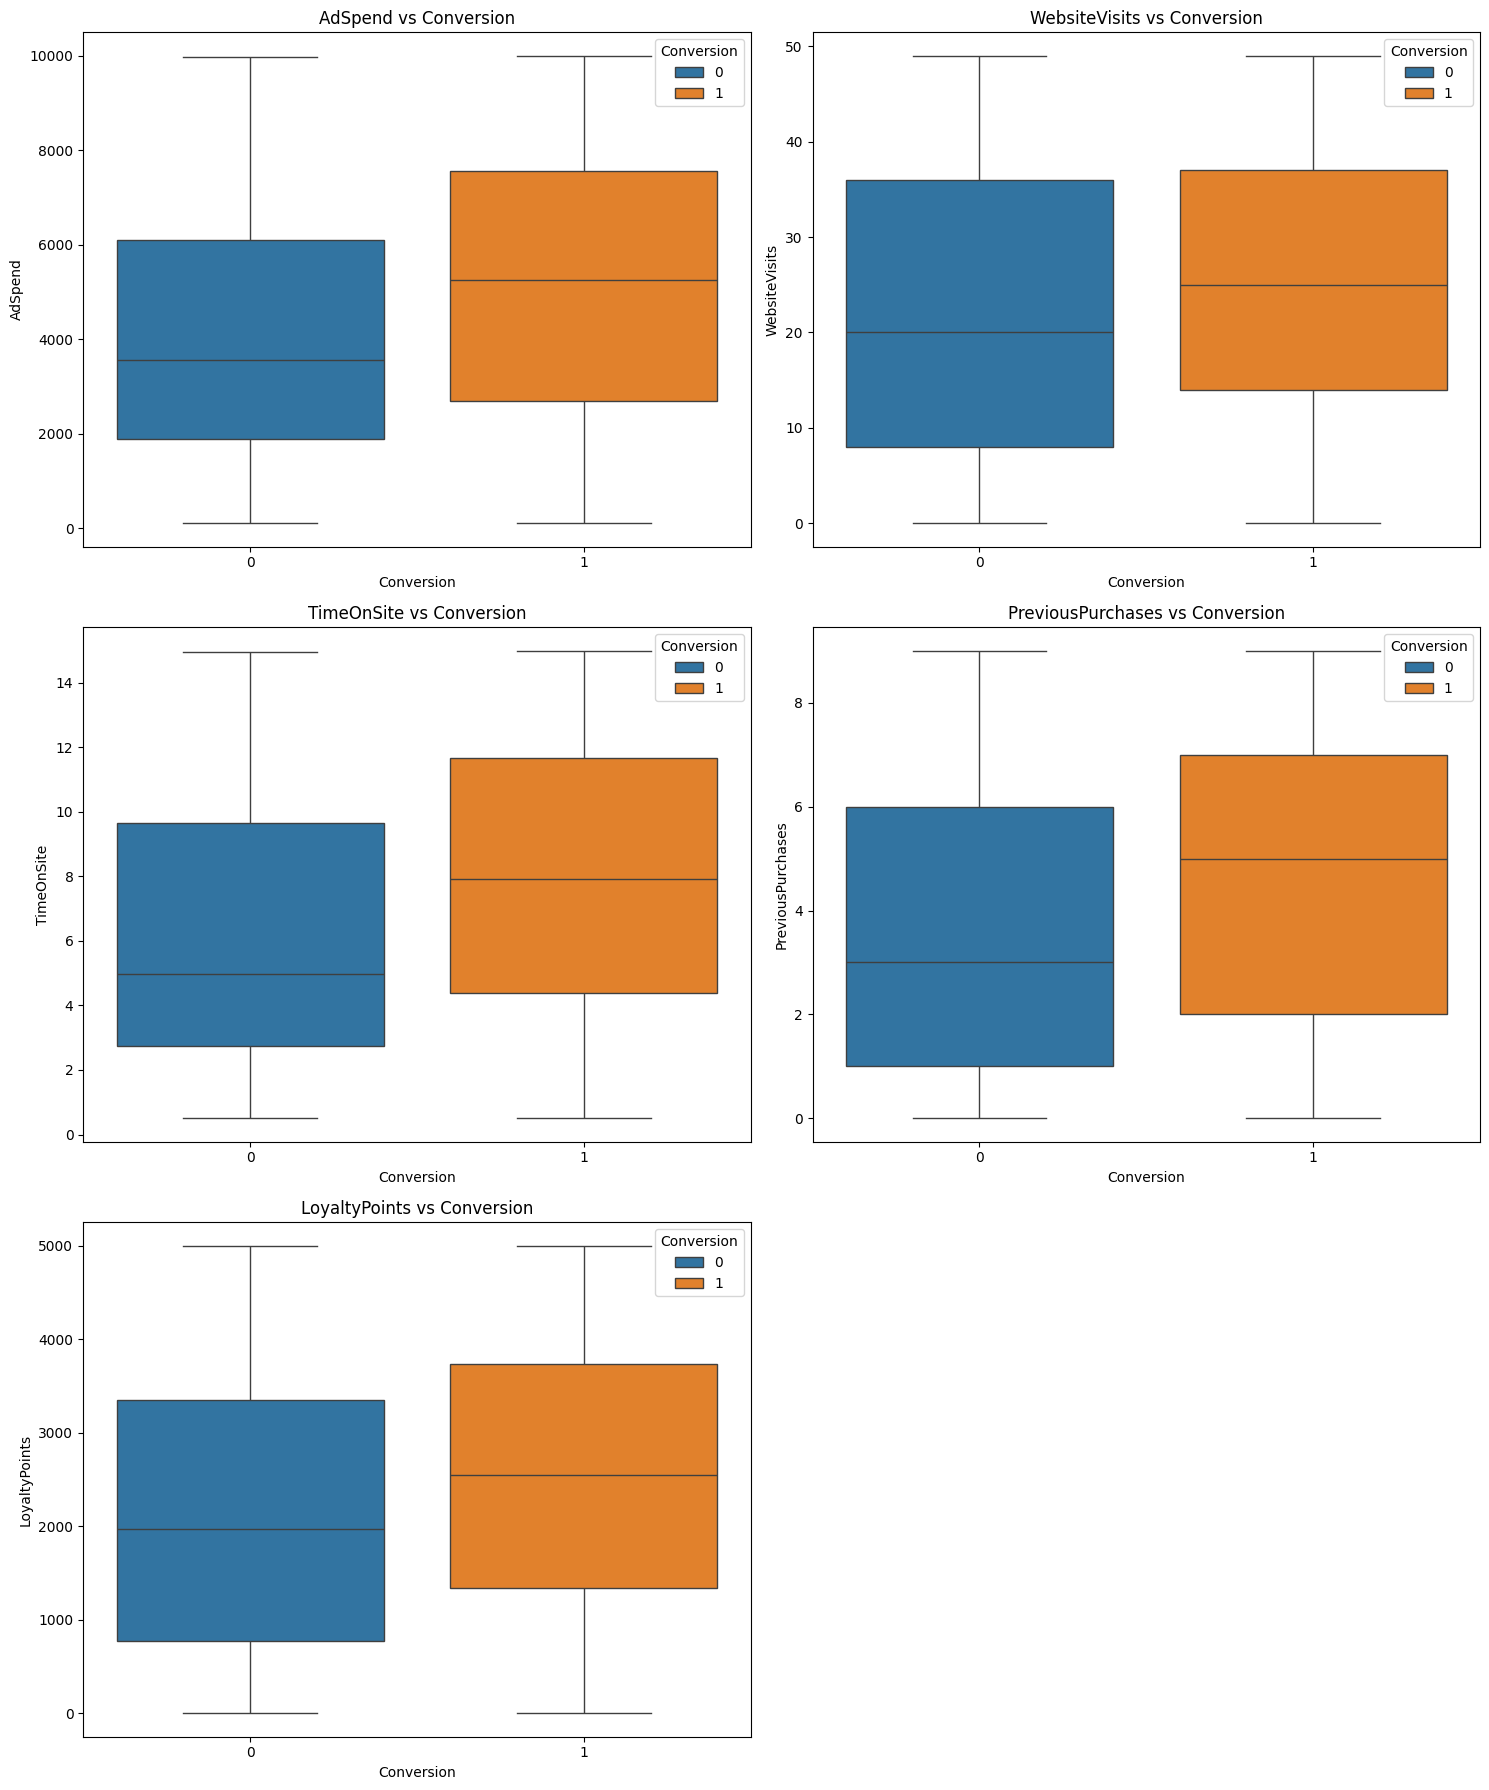

In [19]:
# Define columns for boxplots
features = ['AdSpend', 'WebsiteVisits', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plot boxplots
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.boxplot(x='Conversion', y=feature, data=df, hue='Conversion', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Conversion')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()


Step 5 : _Feature Engineering_
-

**_Seperate Data in Features and Target_**

In [20]:
#Separate Features and target
X = df.drop('Conversion', axis= 1) # X is Features
Y = df['Conversion']   # Y is Target

**_seperate features in numeric and categorical columns list for Scaling and Encoding_**

In [21]:
num_col = X.select_dtypes(['number']).columns #numeric columns list for Scaling
cat_col = X.select_dtypes('object').columns #categorical columns list for Encoding
num_col, cat_col

(Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
        'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
        'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'],
       dtype='object'),
 Index(['Gender', 'CampaignChannel', 'CampaignType'], dtype='object'))

**_Scaling of numeric columns of feature_**

In [22]:
# Scaling the numerical columns using StandardScaler
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])

**_Encoding Categorical columns of features_**

In [23]:
# Loop through each categorical column and encode its values as integers using LabelEncoder
for col in cat_col:
    X[col] = LabelEncoder().fit_transform(X[col])

**_Correlation Matrix:_**


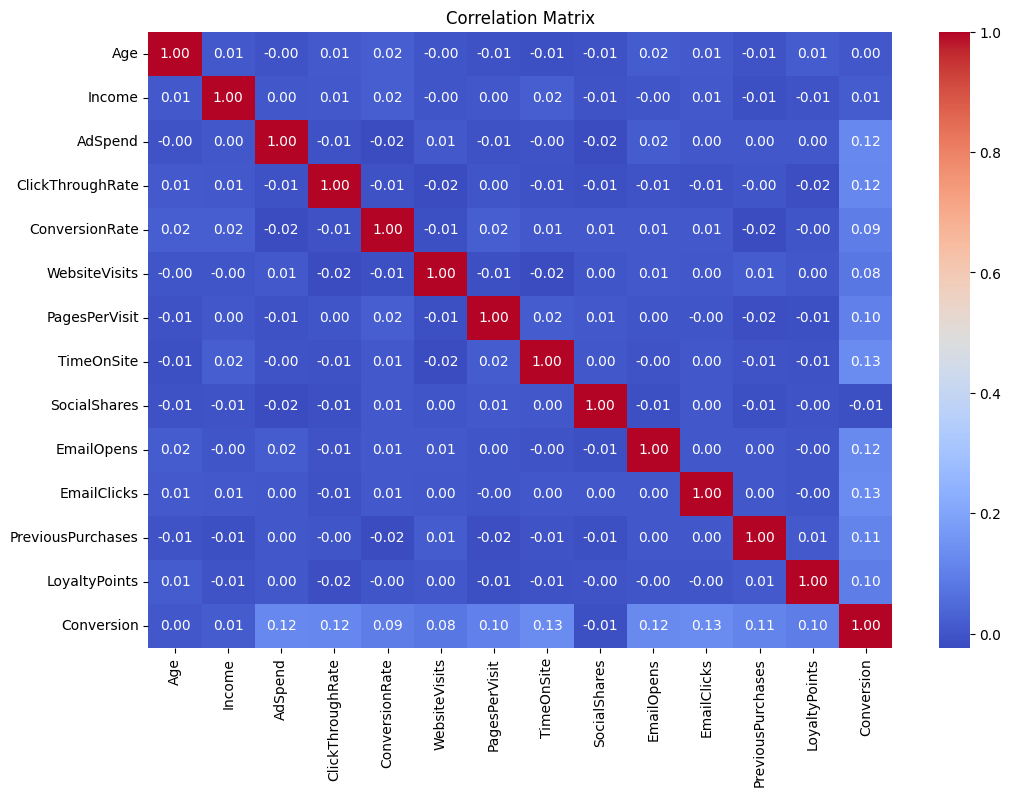

In [24]:
# Ensure the DataFrame contains only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=["int64", "float64"])

# Compute and plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**_Split Data into Train and test_**

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

_Step 6 : Model selection_
-

**_Model Evaluation Function_**

In [26]:
# Define Model Evaluation Function
def model_evaluation(model, X_train, X_test, y_train, y_test, k=5):
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=k)
    print(f"Cross-Validation Scores (K={k}): {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.2f}")
    print(f"Standard Deviation: {cv_scores.std():.2f}")

    # Fit and Predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Prepare Subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.tight_layout(pad=5.0)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0], linewidths=0.5)
    axes[0, 0].set_title("Confusion Matrix", fontsize=18)
    axes[0, 0].set_xlabel("Predicted labels", fontsize=14)
    axes[0, 0].set_ylabel("Actual labels", fontsize=14)

    # Classification Report
    report_dict = classification_report(y_test, y_pred, output_dict=True, digits=3)
    report_df = pd.DataFrame(report_dict).iloc[:-1, :-1].T
    sns.heatmap(report_df, annot=True, fmt="0.3f", cmap="Blues", ax=axes[0, 1], linewidths=0.5)
    axes[0, 1].set_title("Classification Report", fontsize=18)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[1, 0].plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    axes[1, 0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    axes[1, 0].set_xlim([0.0, 1.0])
    axes[1, 0].set_ylim([0.0, 1.05])
    axes[1, 0].set_xlabel("False Positive Rate")
    axes[1, 0].set_ylabel("True Positive Rate")
    axes[1, 0].set_title("ROC Curve", fontsize=18)
    axes[1, 0].legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    axes[1, 1].plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall curve (AP = {avg_precision:.2f})")
    axes[1, 1].set_xlabel("Recall")
    axes[1, 1].set_ylabel("Precision")
    axes[1, 1].set_title("Precision-Recall Curve", fontsize=18)
    axes[1, 1].legend(loc="lower left")

    plt.show()

    # Return Accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1


In [27]:
# list for comparing models accuracy and f1_score
Model_name = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Gradient Boosing", "Ada Boost"]
Model_acc = []
Model_f1 = []

_Step 7 : Model building_
-

**_1. Logistic Regression_**

Cross-Validation Scores (K=5): [0.89140625 0.8921875  0.8796875  0.89765625 0.89453125]
Mean Accuracy: 0.89
Standard Deviation: 0.01


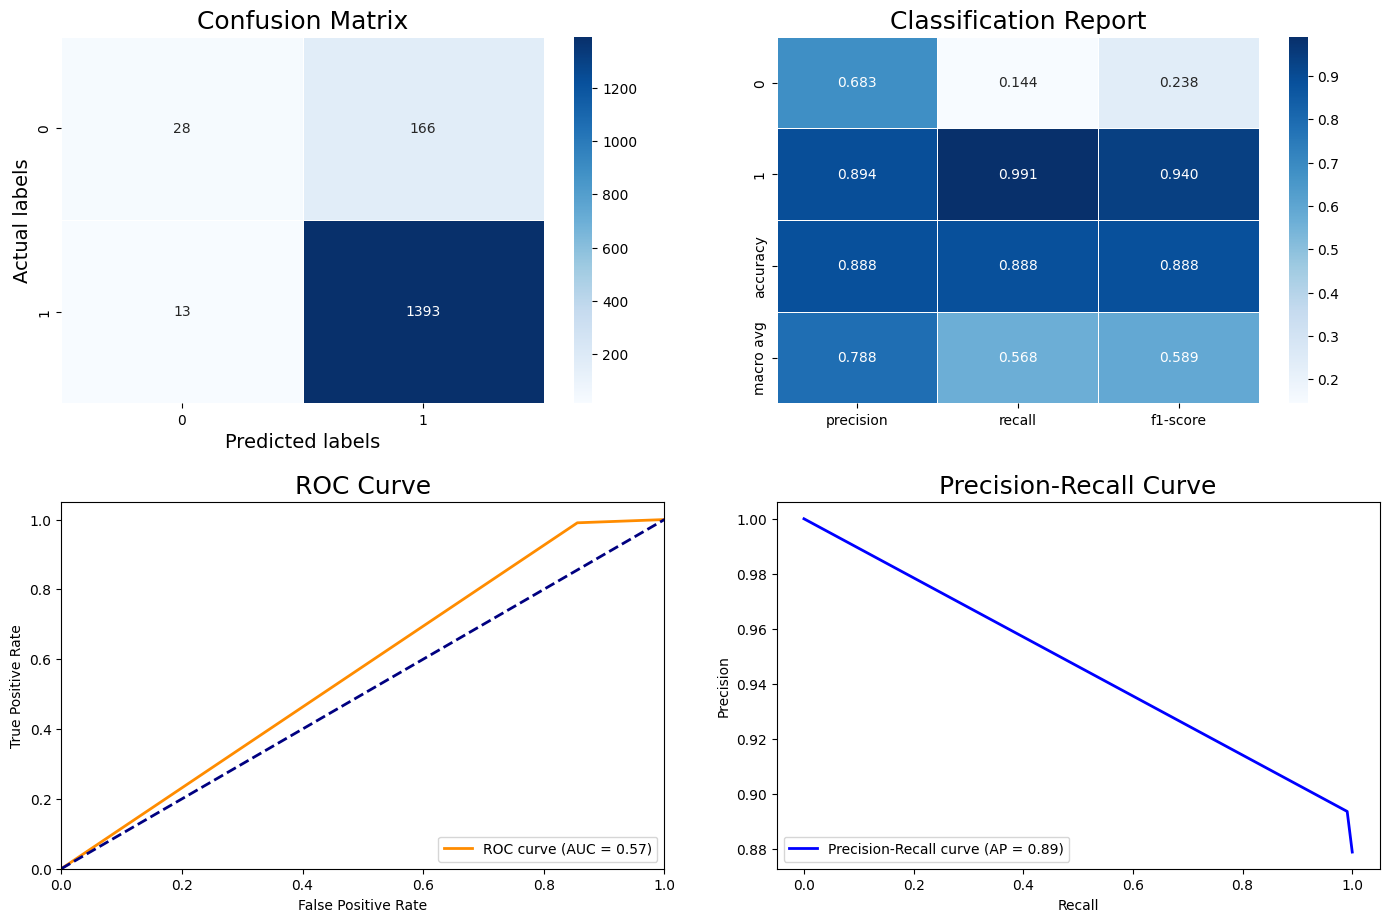

In [28]:
# Initialize Logistic Regression model
LR = LogisticRegression()

# Evaluate the model and get accuracy and F1-score
LR_acc, LR_f1 = model_evaluation(LR, X_train, X_test, y_train, y_test)

# Append accuracy and F1-score to respective lists
Model_acc.append(LR_acc)
Model_f1.append(LR_f1)

**_2. Decision Tree_**

Cross-Validation Scores (K=5): [0.83671875 0.82578125 0.821875   0.82421875 0.85      ]
Mean Accuracy: 0.83
Standard Deviation: 0.01


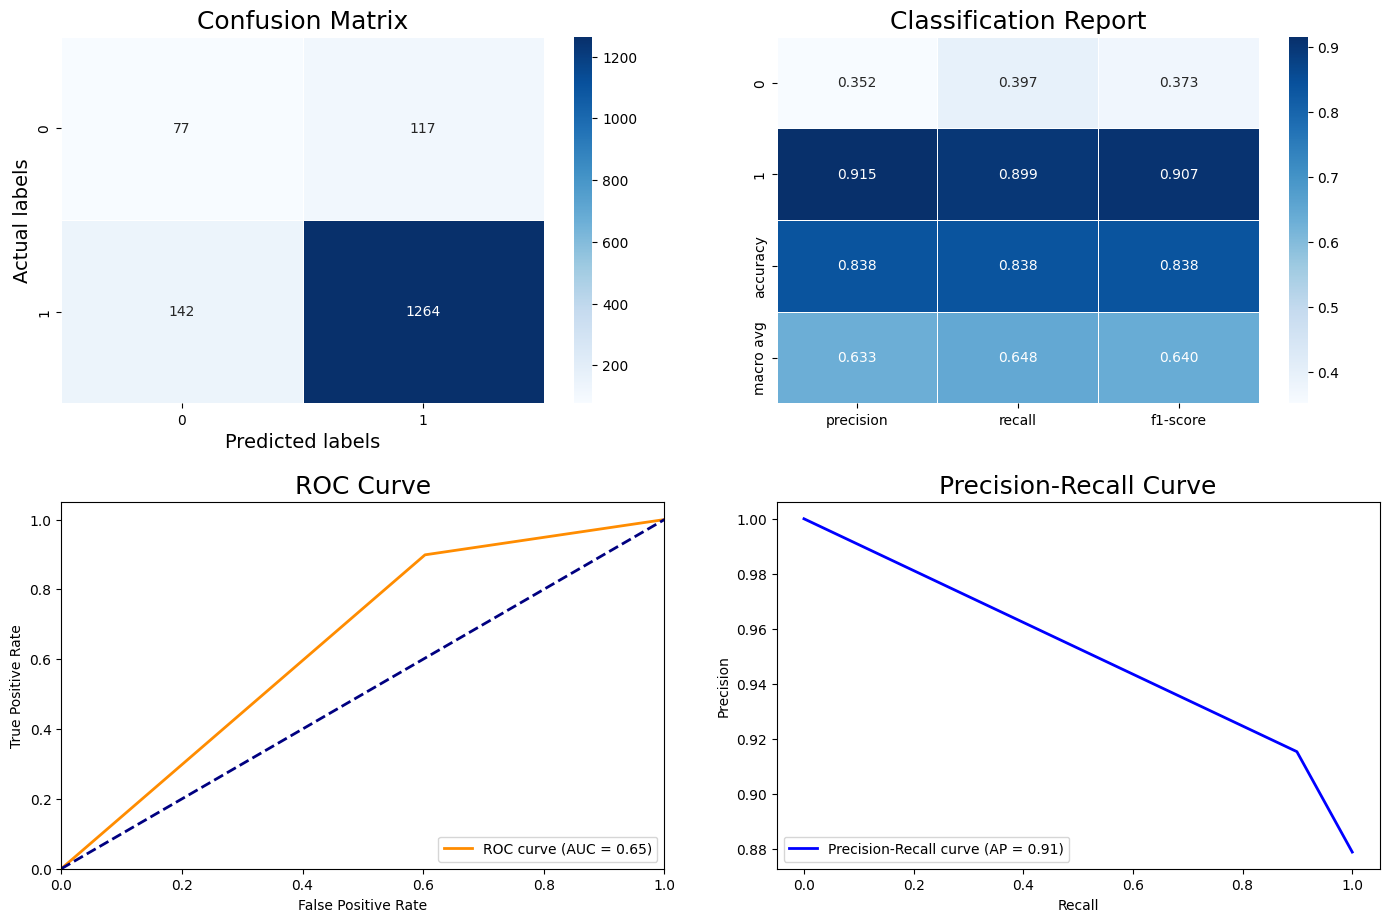

In [29]:
# Initialize Decision Tree Classifier model
DT = DecisionTreeClassifier()

# Evaluate the model and get accuracy and F1-score
DT_acc, DT_f1 = model_evaluation(DT, X_train, X_test, y_train, y_test)

# Append accuracy and F1-score to respective lists
Model_acc.append(DT_acc)
Model_f1.append(DT_f1)

**_3. Random Forest_**

Cross-Validation Scores (K=5): [0.89921875 0.8984375  0.88828125 0.89375    0.8953125 ]
Mean Accuracy: 0.90
Standard Deviation: 0.00


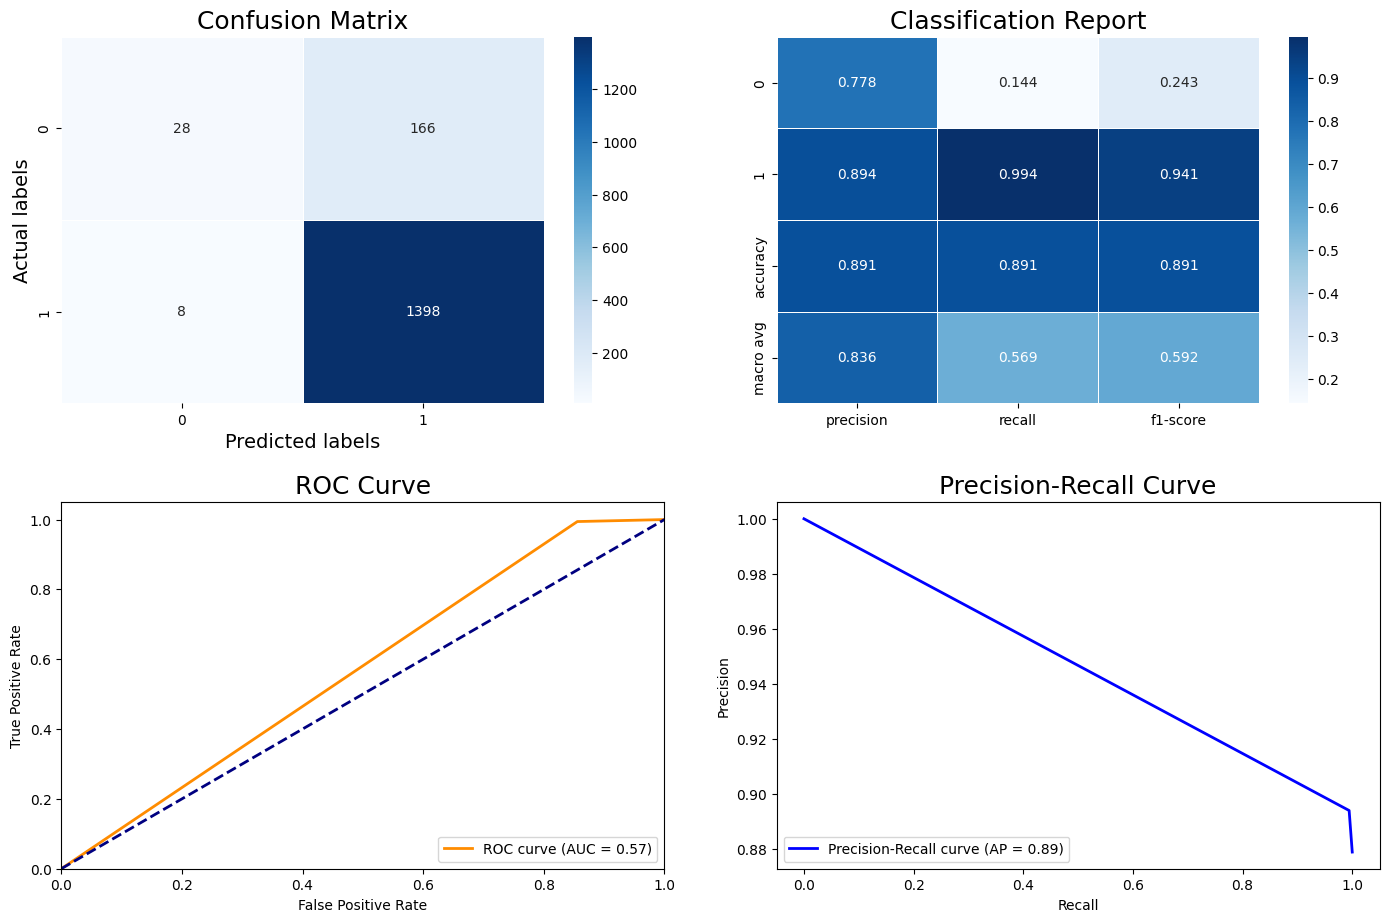

In [30]:
# Initialize Random Forest Classifier model
rf = RandomForestClassifier()

# Evaluate the model and get accuracy and F1-score
rf_acc, rf_f1 = model_evaluation(rf, X_train, X_test, y_train, y_test)

# Append accuracy and F1-score to respective lists
Model_acc.append(rf_acc)
Model_f1.append(rf_f1)

**_4. Support vector matchine_**

Cross-Validation Scores (K=5): [0.890625   0.890625   0.8796875  0.89296875 0.8859375 ]
Mean Accuracy: 0.89
Standard Deviation: 0.00


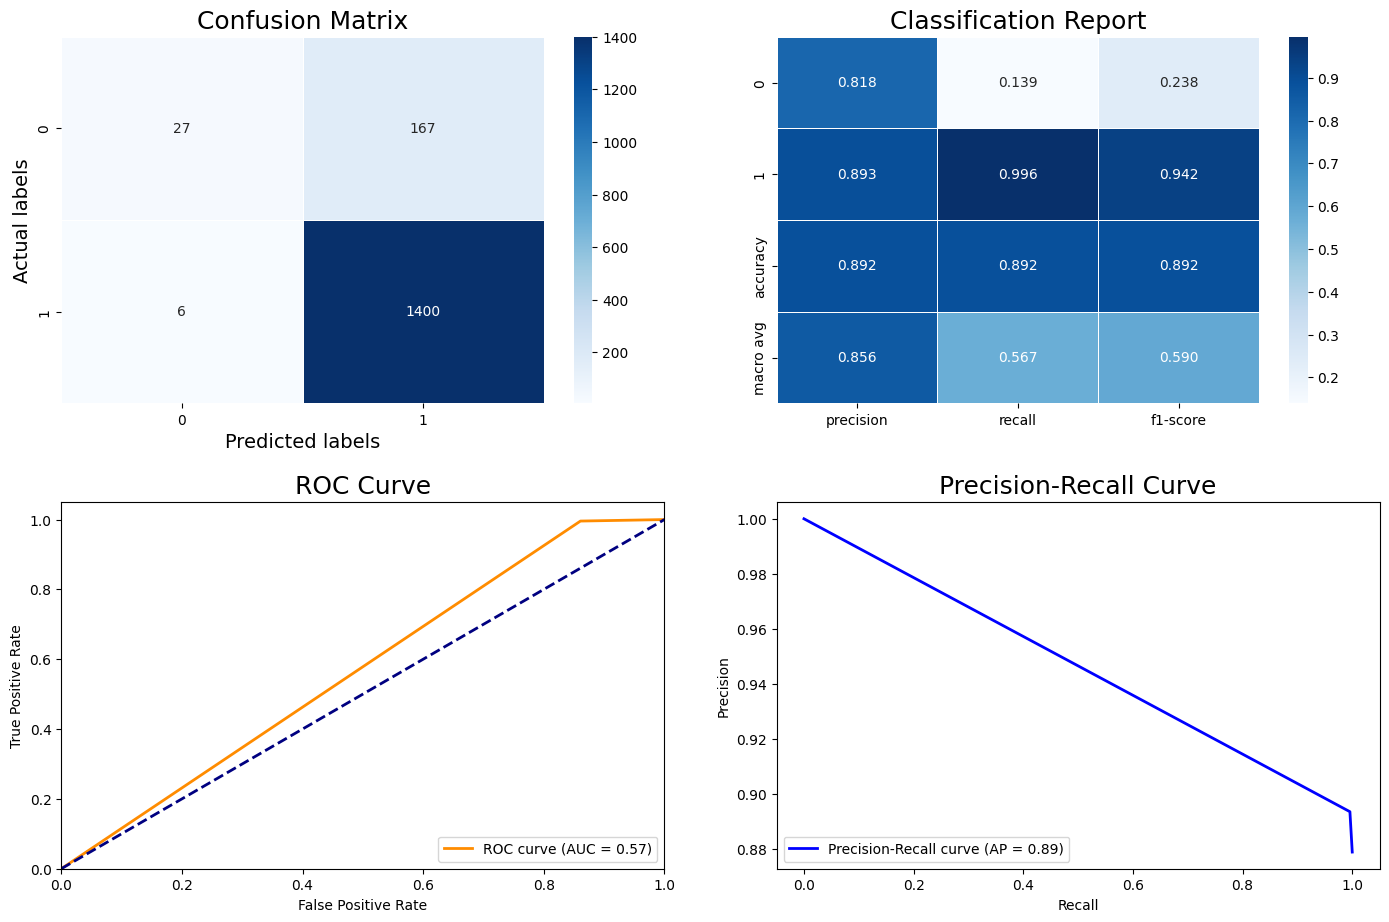

In [31]:
# Initialize Support Vector Classifier (SVC) model
svc = SVC()

# Evaluate the model and get accuracy and F1-score
svc_acc, svc_f1 = model_evaluation(svc, X_train, X_test, y_train, y_test)

# Append accuracy and F1-score to respective lists
Model_acc.append(svc_acc)
Model_f1.append(svc_f1)

**_5. Gradient Boosting_**

Cross-Validation Scores (K=5): [0.921875   0.9125     0.89921875 0.9234375  0.9171875 ]
Mean Accuracy: 0.91
Standard Deviation: 0.01


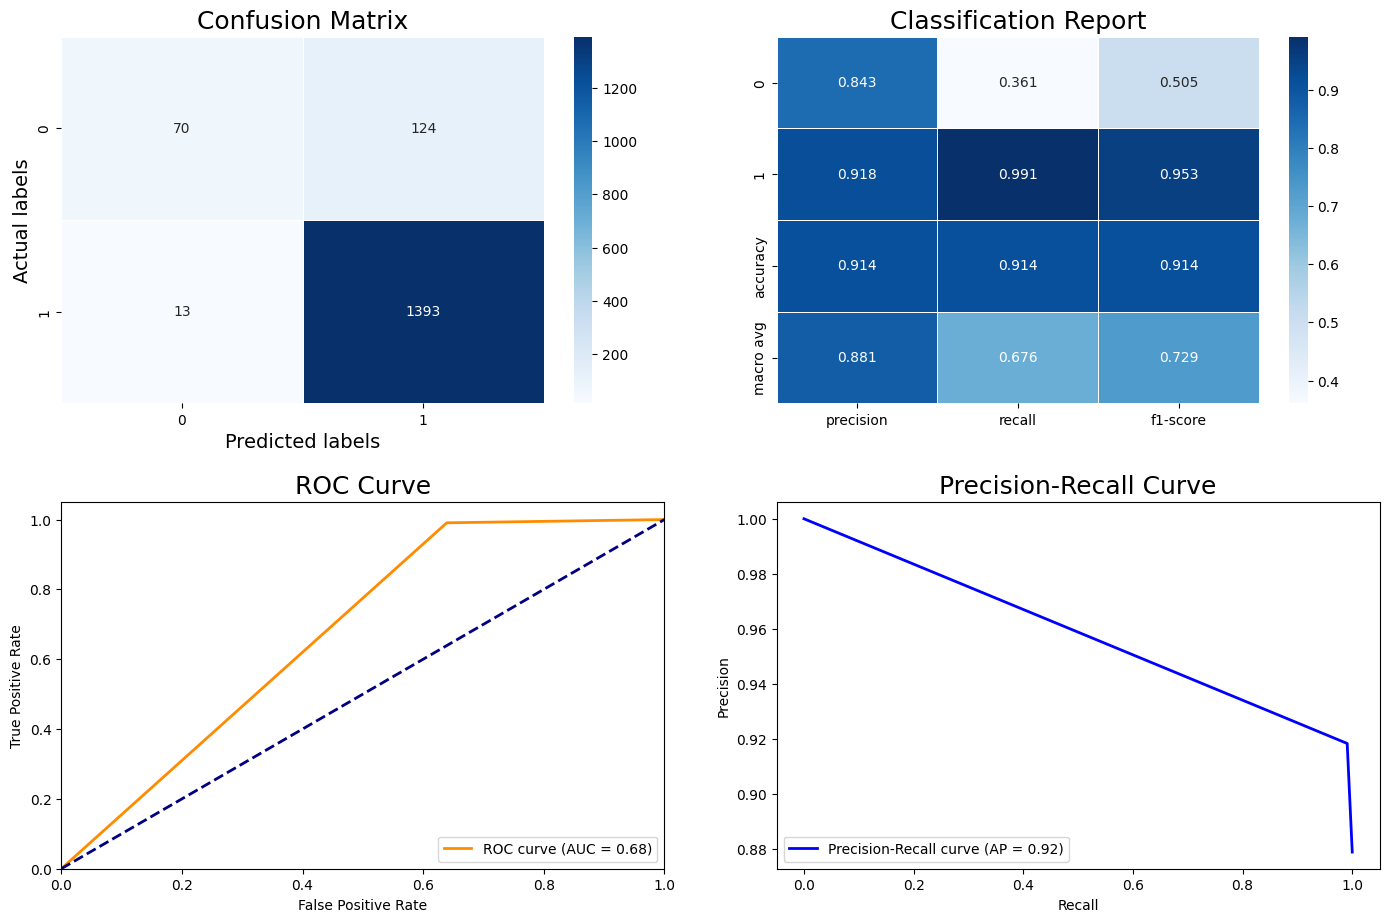

In [32]:
# Initialize Gradient Boosting Classifier model
GB = GradientBoostingClassifier()

# Evaluate the model and get accuracy and F1-score
GB_acc, GB_f1 = model_evaluation(GB, X_train, X_test, y_train, y_test)

# Append accuracy and F1-score to respective lists
Model_acc.append(GB_acc)
Model_f1.append(GB_f1)


**_6. AdaBoost_**

Cross-Validation Scores (K=5): [0.90546875 0.903125   0.90078125 0.90078125 0.89140625]
Mean Accuracy: 0.90
Standard Deviation: 0.00


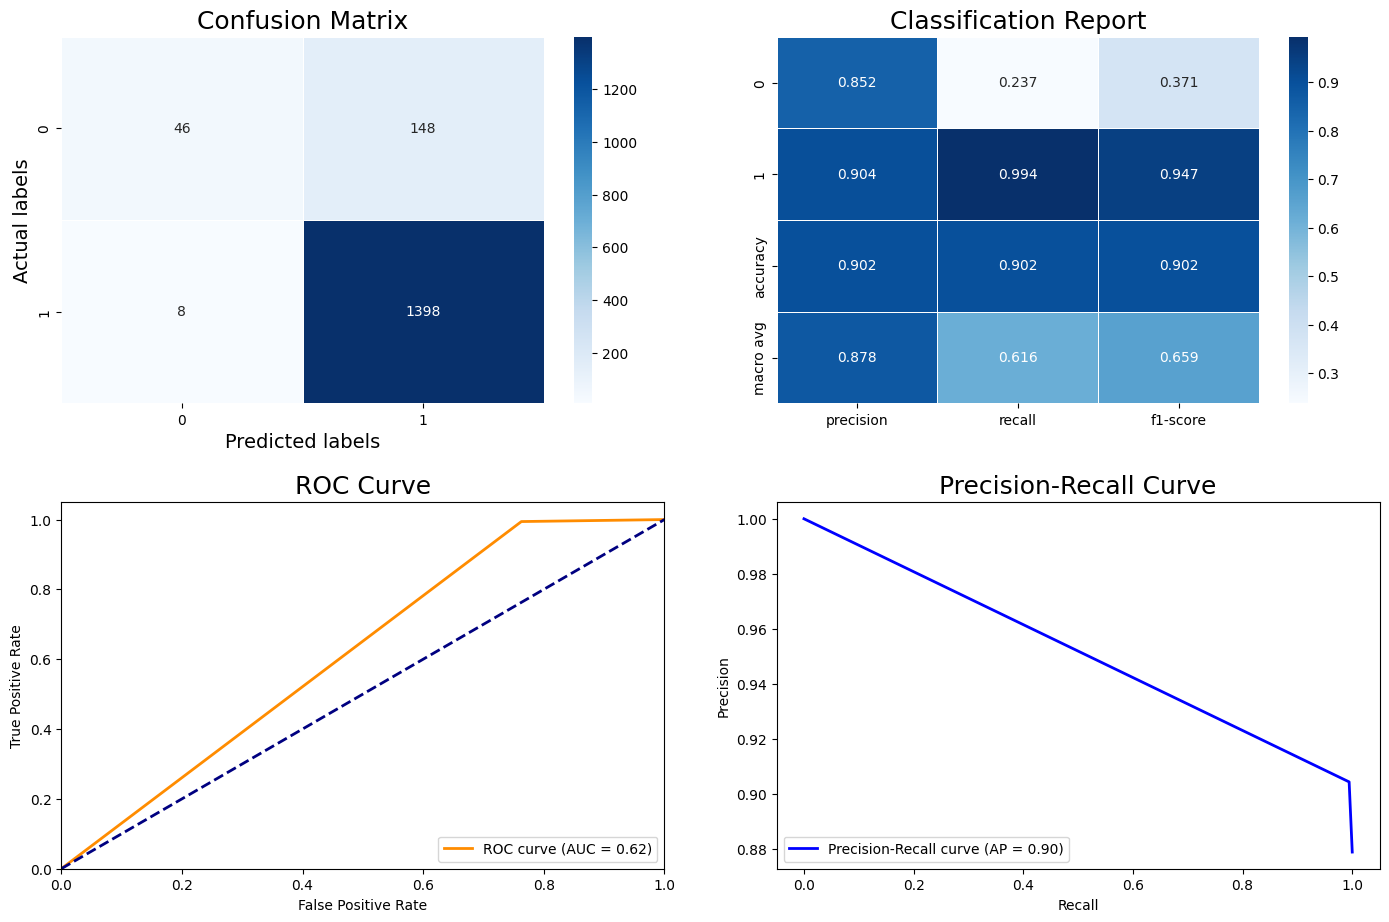

In [33]:
# Initialize AdaBoost Classifier model
AB = AdaBoostClassifier()

# Evaluate the model and get accuracy and F1-score
AB_acc, AB_f1 = model_evaluation(AB, X_train, X_test, y_train, y_test)

# Append accuracy and F1-score to respective lists
Model_acc.append(AB_acc)
Model_f1.append(AB_f1)


**_Model Accuracy Comparison_**

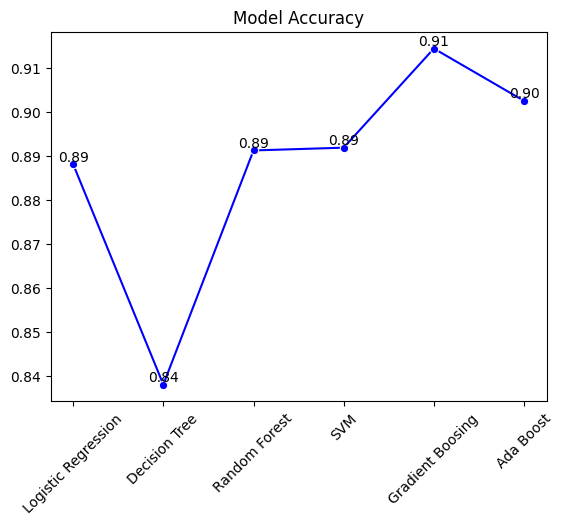

In [34]:
# Line chart for Model Accuracy
ax = sns.lineplot(x=Model_name, y=Model_acc, marker='o', color='blue')

# Add title and adjust x-ticks rotation
plt.title('Model Accuracy')
plt.xticks(rotation=45)

# Add data labels on each point
for i, value in enumerate(Model_acc):
    ax.text(i, value, f'{value:.2f}', fontsize=10, ha='center', va='bottom')

plt.show()


**_Model F1 Score Comparison_**

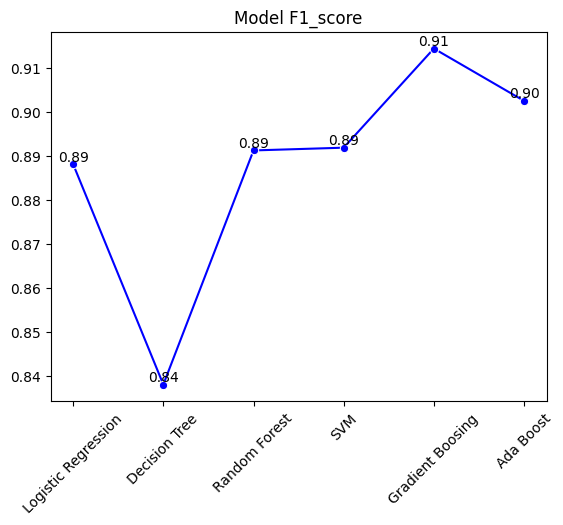

In [35]:
# Line chart for Model F1 score
ax = sns.lineplot(x=Model_name, y=Model_acc, marker='o', color='blue')

# Add title and adjust x-ticks rotation
plt.title('Model F1_score')
plt.xticks(rotation=45)

# Add data labels on each point
for x, y in zip(Model_name, Model_acc):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

_Step 8 : Save Model_
-

In [36]:
joblib.dump(GB, "model.pkl")            # save model for Deployment
joblib.dump(scaler, "scaler.pkl")       # save scaler for Deployment

['scaler.pkl']